In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

We use the **Iris dataset**, a classic dataset in machine learning containing measurements of iris flowers (sepal and petal lengths and widths) and their corresponding species (setosa, versicolor, virginica).

This is a **multiclass problem** because there are three possible classes to predict.

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
print(X.shape)
print(y.value_counts())

(150, 4)
0    50
1    50
2    50
Name: count, dtype: int64


**Train-Test Split**

We split our data into training and testing sets:
- **Training set**: used to fit (train) the model.
- **Test set**: used to evaluate model performance on unseen data.

We use **stratified sampling** to ensure each class is proportionally represented in both sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Train Logistic Regression Model**

We create a logistic regression model with:
- `multi_class='multinomial'`: uses a true multinomial loss function, suitable for multiclass problems.
- `solver='lbfgs'`: an optimization algorithm efficient for multiclass settings.

We then fit this model to our training data so it can learn to distinguish between the three classes.

In [6]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [7]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

**Predict and Evaluate**

We make predictions on the test set and measure performance using:
- **Accuracy**: percentage of correct predictions overall.
- **Classification report**: includes precision, recall, and F1-score for each class, giving more detailed insights.

In [8]:
y_pred = model.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Confusion Matrix Visualization**

A confusion matrix shows how many samples from each actual class were predicted as each possible class.
- Diagonal elements → correct predictions.
- Off-diagonal elements → misclassifications.

We visualize it using a heatmap to quickly spot which classes the model confuses.

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

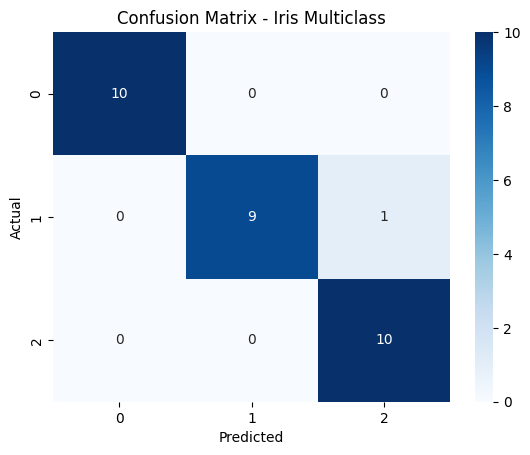

In [11]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Multiclass")
plt.show()

**Analyze Feature Importance**

We look at the learned **coefficients** for each class to understand which features contribute most to predictions.
- Each class has its own set of coefficients.
- Larger absolute values indicate stronger influence on the decision for that class.

In [12]:
coeff_df = pd.DataFrame(model.coef_, columns=X.columns)
coeff_df['class'] = data.target_names

In [13]:
print(coeff_df)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.527919          0.825463          -2.344461         -1.000718   
1           0.528932         -0.306212          -0.171951         -0.853683   
2          -0.001014         -0.519251           2.516412          1.854401   

        class  
0      setosa  
1  versicolor  
2   virginica  
